#Procesamiento y Clasificación de Datos
##Tarea 2 
###Gloria Samanta Servín García 1731703
###26 Mayo 2022

# Usando base de datos Amazon Food Reviews

In [ ]:
import pandas as pd
#Obtenemos nuestros datos desde Drive
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/MCD/Procesamiento/Reviews.csv')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
dataset = df.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator'], axis =1)
dataset.head()

,Score,Time,Summary,Text
0,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
dataset.shape

(568454, 4)

In [ ]:
N = 560000
dataset = dataset.iloc[:-N , :]
dataset.shape

(8454, 4)

In [ ]:
import re

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text) 
    return text

# Cleaning the text in the review column
dataset['Cleaned Reviews'] = dataset['Text'].apply(clean)
dataset.head()

,Score,Time,Summary,Text,Cleaned Reviews
0,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,I have bought several of the Vitality canned d...
1,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled as Jumbo Salted Peanut...
2,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,This is a confection that has been around a fe...
3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,If you are looking for the secret ingredient i...
4,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy at a great price There was a wide ...


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

dataset['POS tagged'] = dataset['Cleaned Reviews'].apply(token_stop_pos)
dataset.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,Score,Time,Summary,Text,Cleaned Reviews,POS tagged
0,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,I have bought several of the Vitality canned d...,"[(bought, v), (several, a), (Vitality, n), (ca..."
1,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled as Jumbo Salted Peanut...,"[(Product, n), (arrived, v), (labeled, v), (Ju..."
2,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,This is a confection that has been around a fe...,"[(confection, n), (around, None), (centuries, ..."
3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,If you are looking for the secret ingredient i...,"[(looking, v), (secret, a), (ingredient, n), (..."
4,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy at a great price There was a wide ...,"[(Great, n), (taffy, n), (great, a), (price, n..."


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
dataset['Lemma'] = dataset['POS tagged'].apply(lemmatize)
dataset.head()

,Score,Time,Summary,Text,Cleaned Reviews,POS tagged,Lemma
0,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,I have bought several of the Vitality canned d...,"[(bought, v), (several, a), (Vitality, n), (ca...",buy several Vitality can dog food product fi...
1,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled as Jumbo Salted Peanut...,"[(Product, n), (arrived, v), (labeled, v), (Ju...",Product arrive label Jumbo Salted Peanuts pe...
2,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,This is a confection that has been around a fe...,"[(confection, n), (around, None), (centuries, ...",confection around century light pillowy citr...
3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,If you are looking for the secret ingredient i...,"[(looking, v), (secret, a), (ingredient, n), (...",look secret ingredient Robitussin believe fi...
4,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy at a great price There was a wide ...,"[(Great, n), (taffy, n), (great, a), (price, n...",Great taffy great price wide assortment yumm...


In [ ]:

dataset[['Text', 'Lemma']]

,Text,Lemma
0,I have bought several of the Vitality canned d...,buy several Vitality can dog food product fi...
1,Product arrived labeled as Jumbo Salted Peanut...,Product arrive label Jumbo Salted Peanuts pe...
2,This is a confection that has been around a fe...,confection around century light pillowy citr...
3,If you are looking for the secret ingredient i...,look secret ingredient Robitussin believe fi...
4,Great taffy at a great price. There was a wid...,Great taffy great price wide assortment yumm...
...,...,...
8449,I expected more flavor from W. Puck. Though th...,expect flavor W Puck Though coffee taste goo...
8450,I've tried all Vanilla coffee K-cups and by fa...,try Vanilla coffee K cup far best Wolf Gang ...
8451,"I am not a huge coconut fan, so I wasn't excit...",huge coconut fan excite try one sip definite...
8452,This is my daughter's favorite K-cup product. ...,daughter favorite K cup product Mild medium ...


# Analisis de sentimiento usando TextBlob

In [ ]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
fin_data = pd.DataFrame(dataset[['Text', 'Lemma']])

In [ ]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,Text,Lemma,Polarity,Analysis
0,I have bought several of the Vitality canned d...,buy several Vitality can dog food product fi...,0.466667,Positive
1,Product arrived labeled as Jumbo Salted Peanut...,Product arrive label Jumbo Salted Peanuts pe...,0.216667,Positive
2,This is a confection that has been around a fe...,confection around century light pillowy citr...,0.187000,Positive
3,If you are looking for the secret ingredient i...,look secret ingredient Robitussin believe fi...,0.150000,Positive
4,Great taffy at a great price. There was a wid...,Great taffy great price wide assortment yumm...,0.458333,Positive


In [ ]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Positive    7527
Negative     784
Neutral      143
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f2ace8e6510>,
 [Text(-1.0353753358813167, 0.37148070454419435, 'Positive'),
  Text(1.0141825193235312, -0.4259504871444275, 'Negative'),
  Text(1.3480943322343368, -0.07170544887006518, 'Neutral')],
 [Text(-0.5647501832079909, 0.2026258388422878, '89.0%'),
  Text(0.5531904650855625, -0.2323366293515059, '9.3%'),
  Text(0.8488001351105083, -0.045147875214485475, '1.7%')])

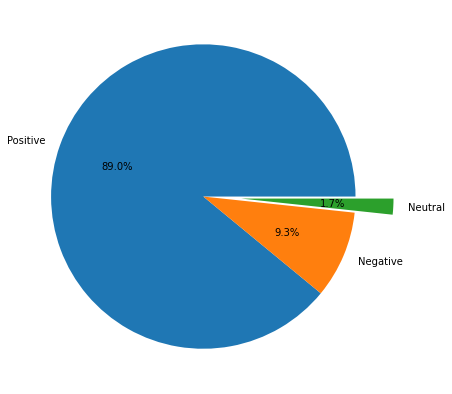

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)


# Analisis de sentimiento usando VADER

In [ ]:
!pip install vaderSentiment


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.2 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment  
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

In [ ]:
# function to analyse 
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,Text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,I have bought several of the Vitality canned d...,buy several Vitality can dog food product fi...,0.466667,Positive,0.9246,Positive
1,Product arrived labeled as Jumbo Salted Peanut...,Product arrive label Jumbo Salted Peanuts pe...,0.216667,Positive,-0.1027,Neutral
2,This is a confection that has been around a fe...,confection around century light pillowy citr...,0.187000,Positive,0.8532,Positive
3,If you are looking for the secret ingredient i...,look secret ingredient Robitussin believe fi...,0.150000,Positive,0.4404,Neutral
4,Great taffy at a great price. There was a wid...,Great taffy great price wide assortment yumm...,0.458333,Positive,0.9468,Positive


In [ ]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Positive    7002
Neutral     1219
Negative     233
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f2acea44c90>,
 [Text(-1.0295107279802047, 0.6165287186933543, 'Positive'),
  Text(0.891310301751218, -0.644644045960368, 'Neutral'),
  Text(1.0958792460840667, -0.09512453943235497, 'Negative')],
 [Text(-0.6005479246551193, 0.3596417525711233, '82.8%'),
  Text(0.48616925550066425, -0.3516240250692916, '14.4%'),
  Text(0.5977523160458545, -0.05188611241764816, '2.8%')])

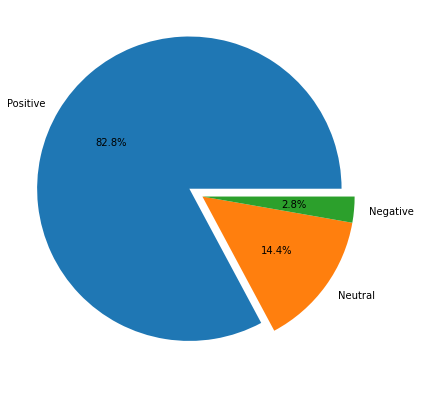

In [ ]:
vader_counts= fin_data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
# plt.legend()

# Analisis using SentiWordNet

In [ ]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return 0
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

fin_data['SWN analysis'] = dataset['POS tagged'].apply(sentiwordnetanalysis)
fin_data.head()

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


,Text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,I have bought several of the Vitality canned d...,buy several Vitality can dog food product fi...,0.466667,Positive,0.9246,Positive,Positive
1,Product arrived labeled as Jumbo Salted Peanut...,Product arrive label Jumbo Salted Peanuts pe...,0.216667,Positive,-0.1027,Neutral,Negative
2,This is a confection that has been around a fe...,confection around century light pillowy citr...,0.187000,Positive,0.8532,Positive,Neutral
3,If you are looking for the secret ingredient i...,look secret ingredient Robitussin believe fi...,0.150000,Positive,0.4404,Neutral,Positive
4,Great taffy at a great price. There was a wid...,Great taffy great price wide assortment yumm...,0.458333,Positive,0.9468,Positive,Positive


In [ ]:
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

Positive    6557
Negative    1585
Neutral      312
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f2ac509f190>,
 [Text(-0.9139770168120671, 0.7775898743806495, 'Positive'),
  Text(0.7497297956541136, -0.8049256074373838, 'Negative'),
  Text(1.0926148441297023, -0.12725094257971759, 'Neutral')],
 [Text(-0.5331532598070392, 0.45359409338871215, '77.6%'),
  Text(0.4089435249022437, -0.43905033132948207, '18.7%'),
  Text(0.5959717331616557, -0.06940960504348231, '3.7%')])

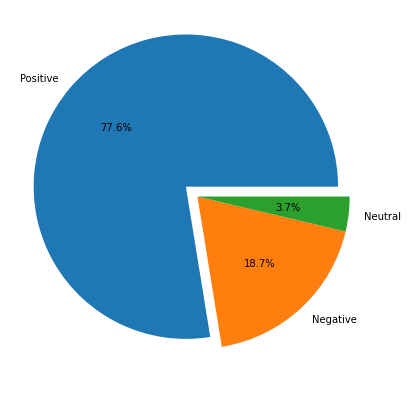

In [ ]:
swn_counts= fin_data['SWN analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)


([<matplotlib.patches.Wedge at 0x7f2ac4f92350>,
 [Text(-0.8378122654110616, 0.712790718182262, 'Positive'),
  Text(0.7497297956541136, -0.8049256074373838, 'Negative'),
  Text(1.3409363996137256, -0.15617161134783522, 'Neutral')],
 [Text(-0.45698850840603356, 0.3887949371903247, '77.6%'),
  Text(0.4089435249022437, -0.43905033132948207, '18.7%'),
  Text(0.844293288645679, -0.09833027381159995, '3.7%')])

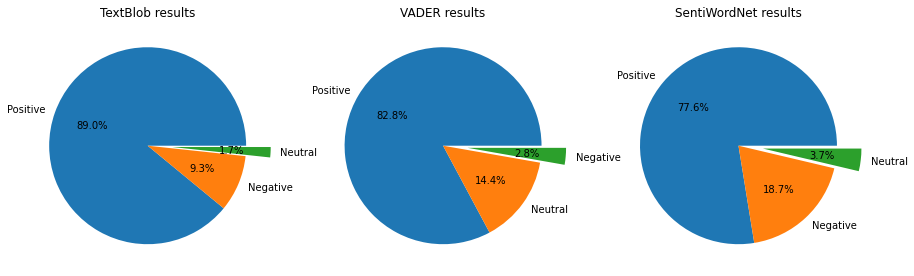

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)